In [ ]:
from google.colab import files
uploaded = files.upload()

Saving decisiontree_1.csv to decisiontree_1.csv


In [ ]:
import pandas as pd

filename = list(uploaded.keys())[0]   # ambil nama file hasil upload
data = pd.read_csv(filename)
data.head()


,ID,mesin,bangku,penggerak,label
0,1,bensin,4,depan,sedan
1,2,bensin,2,depan,sedan
2,3,bensin,8,belakang,minibus
3,4,diesel,6,depan,minibus
4,5,bensin,5,belakang,minibus


In [ ]:
encoding = {
    "mesin" : {"bensin": 0, "diesel": 1},
    "penggerak" : {"depan": 0, "belakang": 1}
}

data.replace(encoding, inplace=True)
data.head()

/tmp/ipython-input-899982327.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(encoding, inplace=True)


,ID,mesin,bangku,penggerak,label
0,1,0,4,0,sedan
1,2,0,2,0,sedan
2,3,0,8,1,minibus
3,4,1,6,0,minibus
4,5,0,5,1,minibus


In [ ]:
X = data.drop(['ID', 'label'], axis=1)
y = data['label']

In [ ]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X,
    y,
    test_size=0.2)


In [ ]:
import sklearn.tree as tree
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_prediksi = model.predict(X_test)
y_prediksi

array(['minibus', 'sedan', 'minibus', 'sedan', 'minibus', 'sedan',
       'minibus'], dtype=object)

In [ ]:
import sklearn.metrics as met
print (met.accuracy_score(y_test, y_prediksi))
1.0

1.0


1.0

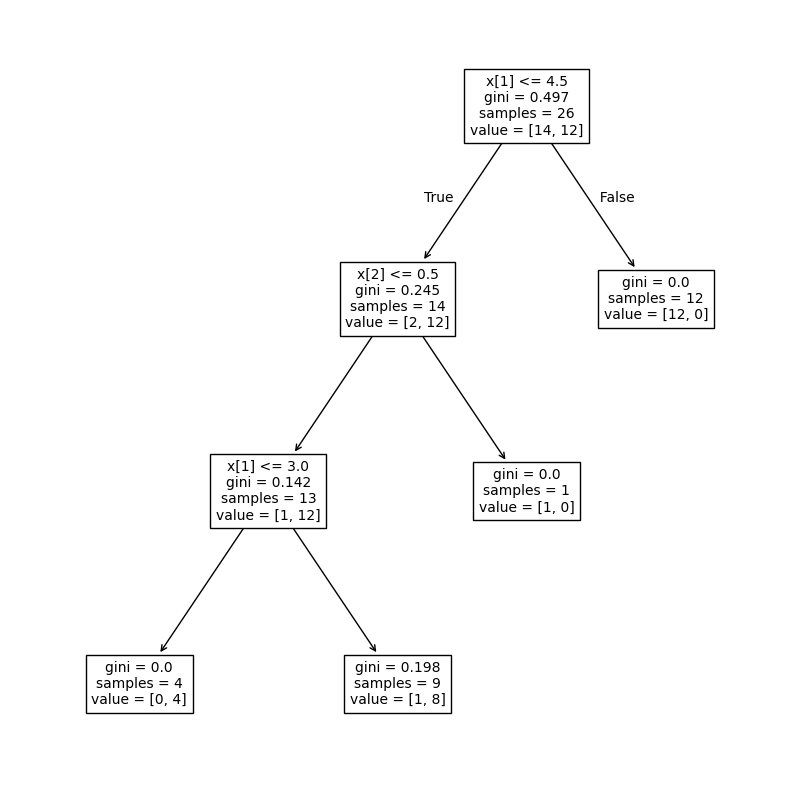

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize=(10, 10))
tree.plot_tree(model, fontsize=10)
plt.show()